Crea un script en Python que use la librería redis.
Define una función agregar_pedido(cliente, producto) que reciba el nombre del cliente y el producto comprado, cree un pedido en formato de diccionario, lo convierta a cadena (ej. JSON) y lo inserte en la lista pedidos usando RPUSH. El formato del JSON será de la forma.
Por ahora, cantidad siempre será 1 y el valor de urgente será False.
Para convertir una estructura de datos a JSON deberás importar la librería json y usar el método json.dumps(). El proceso inverso (recuperar la estructura de datos a partir del JSON) lo puedes realizar con el método json.loads(). Tienes un ejemplo en esta página.
Define una función procesar_pedido() que extraiga un pedido de la lista pedidos usando LPOP, lo convierta de nuevo en diccionario y muestre en pantalla qué pedido se está procesando.

In [5]:
import redis
import json

r = redis.Redis(host='redis-server', port=6379, db=0, decode_responses=True)

def agregar_pedido(cliente, producto):
    pedido = {
        "id": f"pedido_{r.llen('pedidos') + 1:03d}",
        "cliente": cliente,
        "producto": producto,
        "cantidad": 1,
        "urgente": False
    }
    r.rpush("pedidos", json.dumps(pedido))
    print("Pedido agregado:", pedido)

def procesar_pedido():
    pedido_json = r.lpop("pedidos")
    if pedido_json:
        pedido = json.loads(pedido_json)
        print("Procesando pedido:", pedido)
    else:
        print("No hay más pedidos.")

r.delete("pedidos")
agregar_pedido("Juan Pérez", "Portátil Lenovo")
agregar_pedido("Ana Gómez", "Ratón inalámbrico")
agregar_pedido("Carlos Ruiz", "Monitor Samsung")
print("Pedidos actuales:", r.lrange("pedidos", 0, -1))

Pedido agregado: {'id': 'pedido_001', 'cliente': 'Juan Pérez', 'producto': 'Portátil Lenovo', 'cantidad': 1, 'urgente': False}
Pedido agregado: {'id': 'pedido_002', 'cliente': 'Ana Gómez', 'producto': 'Ratón inalámbrico', 'cantidad': 1, 'urgente': False}
Pedido agregado: {'id': 'pedido_003', 'cliente': 'Carlos Ruiz', 'producto': 'Monitor Samsung', 'cantidad': 1, 'urgente': False}
Pedidos actuales: ['{"id": "pedido_001", "cliente": "Juan P\\u00e9rez", "producto": "Port\\u00e1til Lenovo", "cantidad": 1, "urgente": false}', '{"id": "pedido_002", "cliente": "Ana G\\u00f3mez", "producto": "Rat\\u00f3n inal\\u00e1mbrico", "cantidad": 1, "urgente": false}', '{"id": "pedido_003", "cliente": "Carlos Ruiz", "producto": "Monitor Samsung", "cantidad": 1, "urgente": false}']


![Captura de pantalla 2025-11-03 000243.png](<attachment:Captura de pantalla 2025-11-03 000243.png>)
![Captura de pantalla 2025-11-02 233057.png](<attachment:Captura de pantalla 2025-11-02 233057.png>)
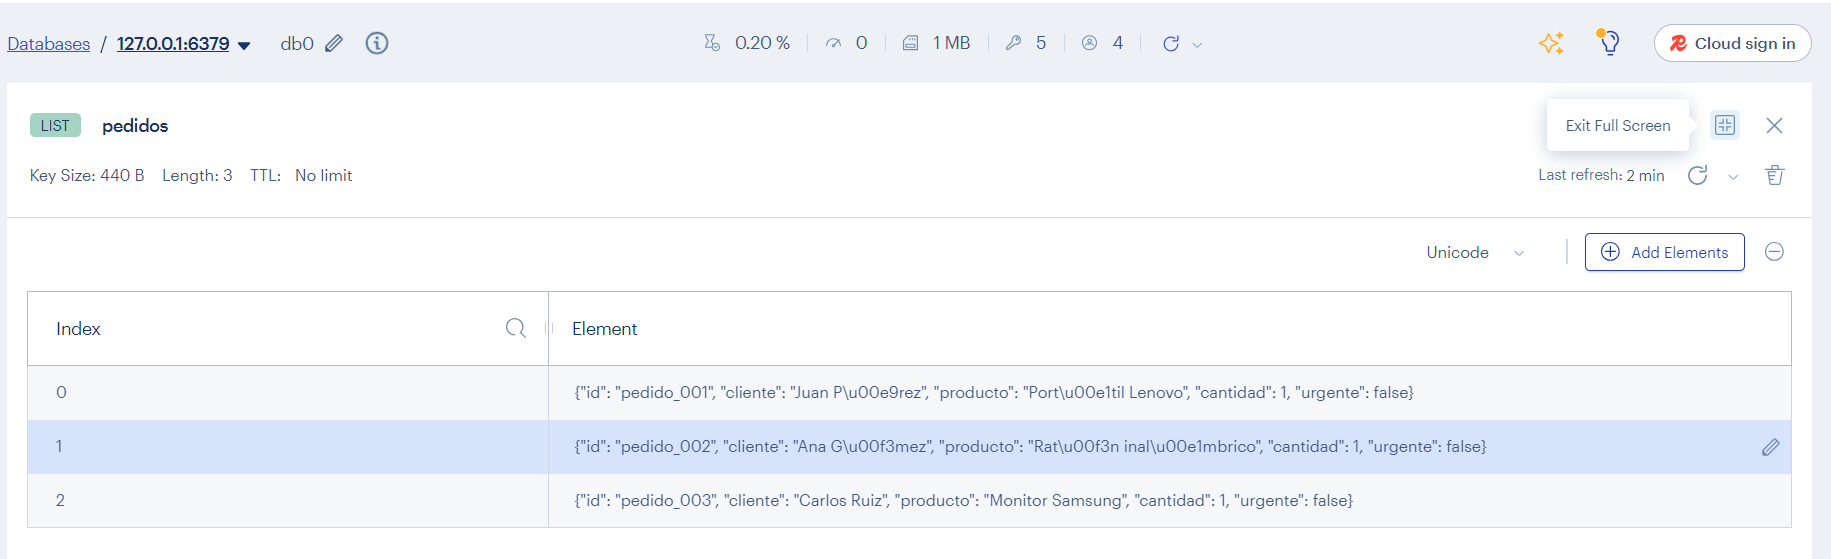
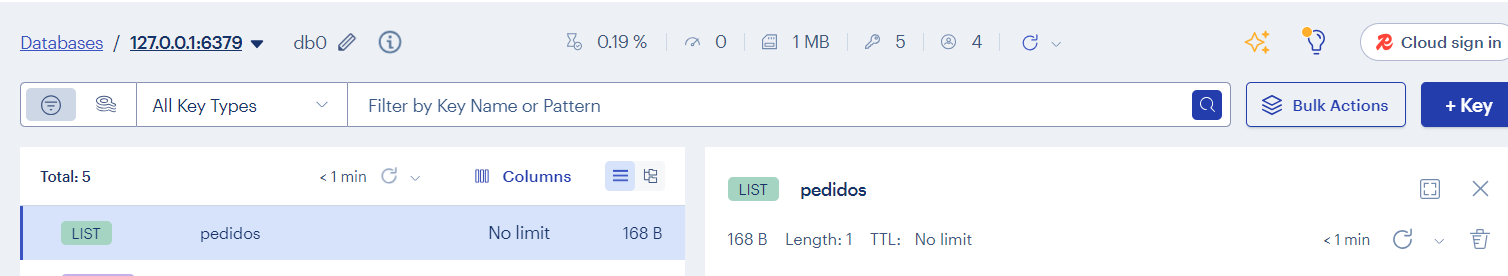

Inserta 5 pedidos iniciales llamando a la función agregar_pedido.

In [6]:
agregar_pedido("Marta Torres", "Tablet Samsung")
agregar_pedido("Luis García", "Webcam Logitech")

Pedido agregado: {'id': 'pedido_004', 'cliente': 'Marta Torres', 'producto': 'Tablet Samsung', 'cantidad': 1, 'urgente': False}
Pedido agregado: {'id': 'pedido_005', 'cliente': 'Luis García', 'producto': 'Webcam Logitech', 'cantidad': 1, 'urgente': False}


![Captura de pantalla 2025-11-02 233607.png](<attachment:Captura de pantalla 2025-11-02 233607.png>)
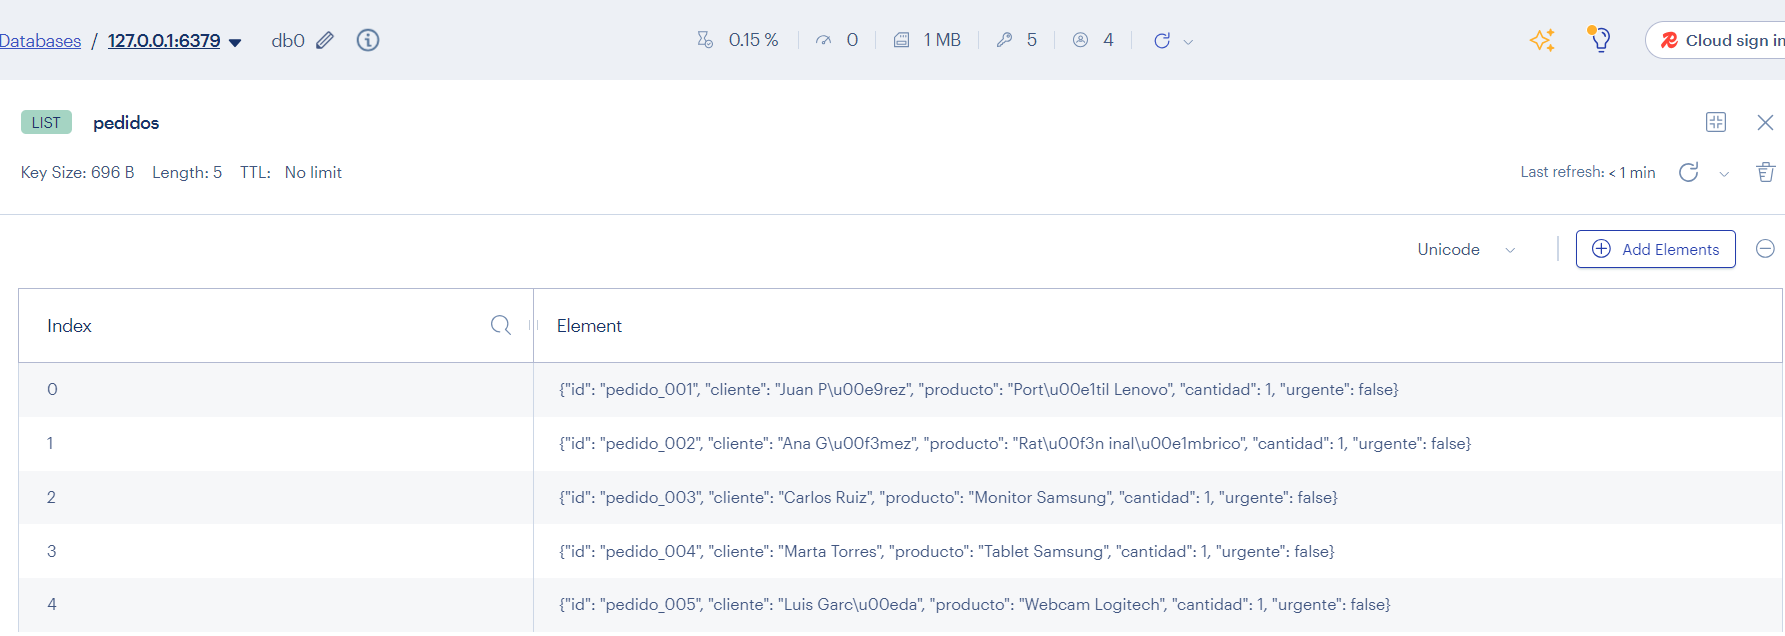

Muestra todos los pedidos actuales en la cola con LRANGE.

In [7]:
print(r.lrange("pedidos", 0, -1))

['{"id": "pedido_001", "cliente": "Juan P\\u00e9rez", "producto": "Port\\u00e1til Lenovo", "cantidad": 1, "urgente": false}', '{"id": "pedido_002", "cliente": "Ana G\\u00f3mez", "producto": "Rat\\u00f3n inal\\u00e1mbrico", "cantidad": 1, "urgente": false}', '{"id": "pedido_003", "cliente": "Carlos Ruiz", "producto": "Monitor Samsung", "cantidad": 1, "urgente": false}', '{"id": "pedido_004", "cliente": "Marta Torres", "producto": "Tablet Samsung", "cantidad": 1, "urgente": false}', '{"id": "pedido_005", "cliente": "Luis Garc\\u00eda", "producto": "Webcam Logitech", "cantidad": 1, "urgente": false}']


Inserta 2 pedidos adicionales (simulando nuevos clientes).

In [8]:
agregar_pedido("Laura Díaz", "Teclado mecánico")
agregar_pedido("Pedro López", "Impresora HP")

Pedido agregado: {'id': 'pedido_006', 'cliente': 'Laura Díaz', 'producto': 'Teclado mecánico', 'cantidad': 1, 'urgente': False}
Pedido agregado: {'id': 'pedido_007', 'cliente': 'Pedro López', 'producto': 'Impresora HP', 'cantidad': 1, 'urgente': False}


![Captura de pantalla 2025-11-04 101523.png](<attachment:Captura de pantalla 2025-11-04 101523.png>)
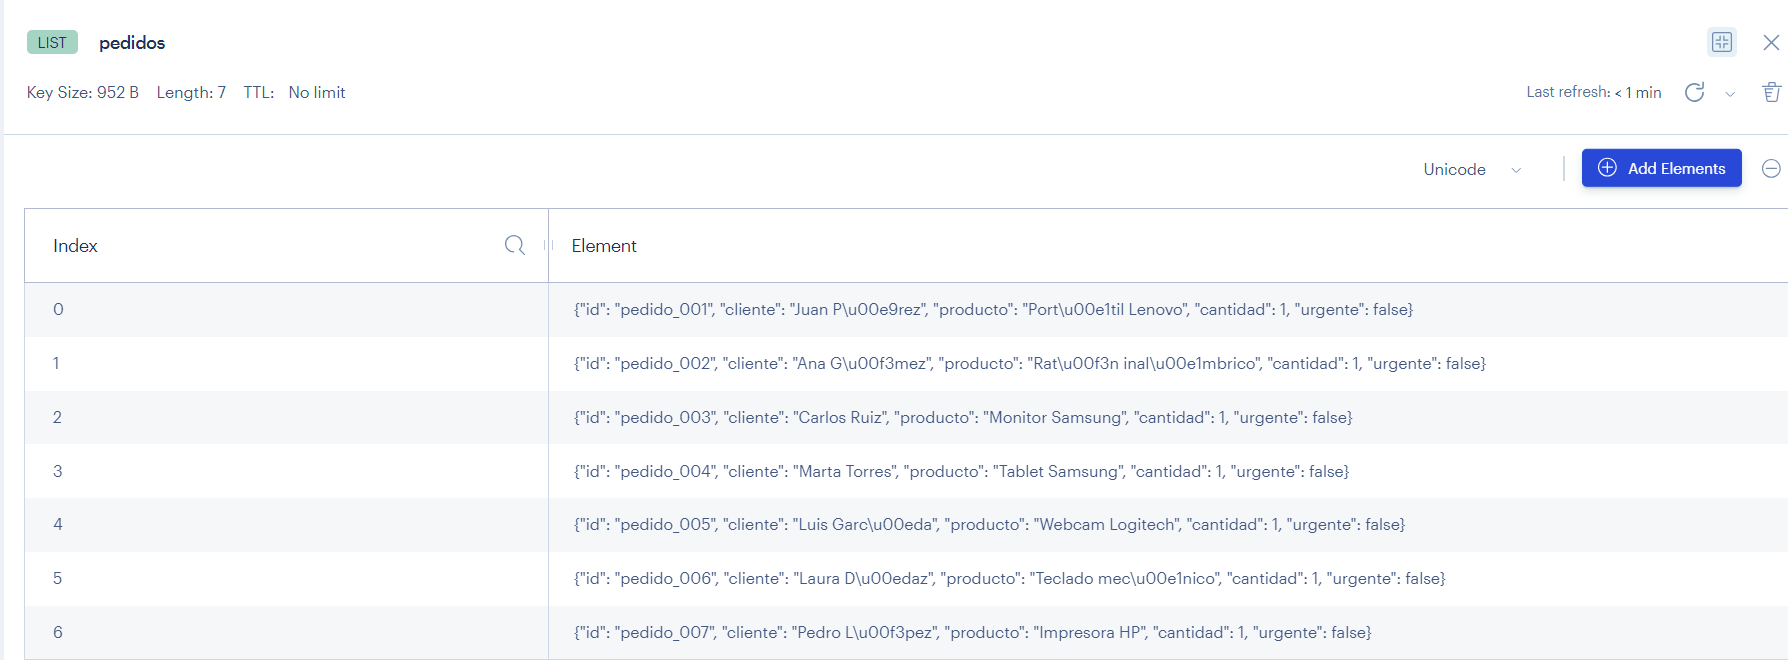

Procesa todos los pedidos de la cola llamando repetidamente a procesar_pedido() hasta que no queden más pedidos.

In [9]:
procesar_pedido()

Procesando pedido: {'id': 'pedido_001', 'cliente': 'Juan Pérez', 'producto': 'Portátil Lenovo', 'cantidad': 1, 'urgente': False}


In [10]:
procesar_pedido()

Procesando pedido: {'id': 'pedido_002', 'cliente': 'Ana Gómez', 'producto': 'Ratón inalámbrico', 'cantidad': 1, 'urgente': False}


In [11]:
procesar_pedido()

Procesando pedido: {'id': 'pedido_003', 'cliente': 'Carlos Ruiz', 'producto': 'Monitor Samsung', 'cantidad': 1, 'urgente': False}


In [12]:
procesar_pedido()

Procesando pedido: {'id': 'pedido_004', 'cliente': 'Marta Torres', 'producto': 'Tablet Samsung', 'cantidad': 1, 'urgente': False}


In [13]:
procesar_pedido()

Procesando pedido: {'id': 'pedido_005', 'cliente': 'Luis García', 'producto': 'Webcam Logitech', 'cantidad': 1, 'urgente': False}


In [14]:
procesar_pedido()

Procesando pedido: {'id': 'pedido_006', 'cliente': 'Laura Díaz', 'producto': 'Teclado mecánico', 'cantidad': 1, 'urgente': False}


In [15]:
procesar_pedido()

Procesando pedido: {'id': 'pedido_007', 'cliente': 'Pedro López', 'producto': 'Impresora HP', 'cantidad': 1, 'urgente': False}


![Captura de pantalla 2025-11-03 000140.png](<attachment:Captura de pantalla 2025-11-03 000140.png>)
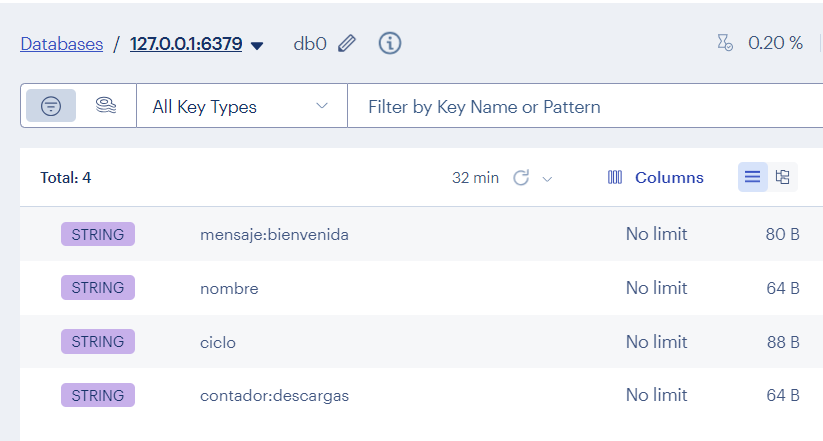

Inserta un pedido urgente con LPUSH (puede implementarse en una versión extendida de la función agregar_pedido) y procésalo antes que el resto.

In [16]:
def agregar_pedido(cliente, producto, urgente=False):
    pedido = {"cliente": cliente, "producto": producto, "cantidad": 1, "urgente": urgente}
    pedido_json = json.dumps(pedido)
    if urgente:
        r.lpush("pedidos", pedido_json)
    else:
        r.rpush("pedidos", pedido_json)
        print("Pedido agregado:", pedido)

In [17]:
agregar_pedido("Sofía Navarro", "Router TP-Link", urgente=True)

![Captura de pantalla 2025-11-03 000311.png](<attachment:Captura de pantalla 2025-11-03 000311.png>)
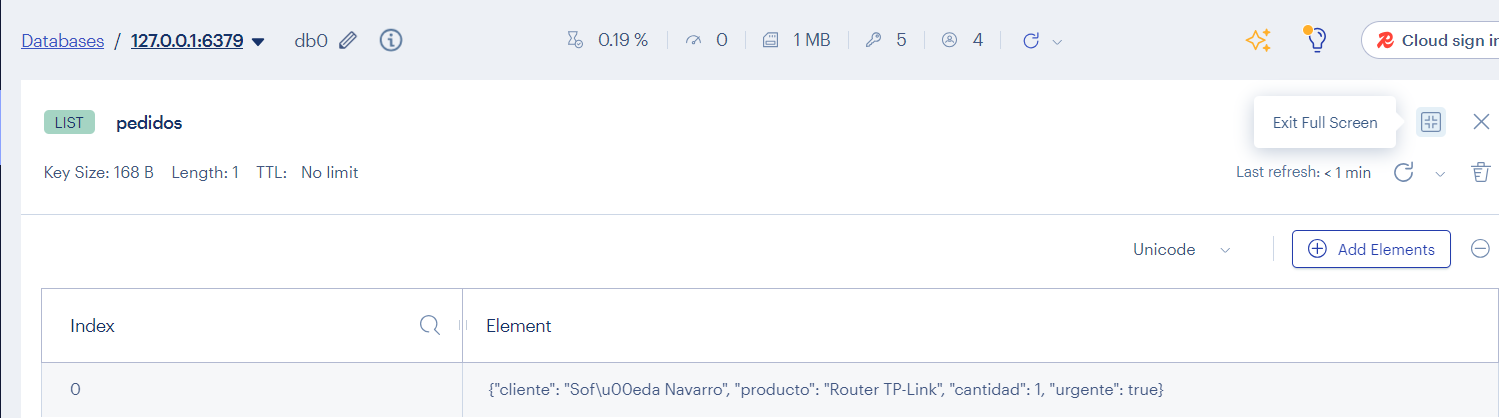

In [18]:
procesar_pedido()

Procesando pedido: {'cliente': 'Sofía Navarro', 'producto': 'Router TP-Link', 'cantidad': 1, 'urgente': True}


![Captura de pantalla 2025-11-03 000428.png](<attachment:Captura de pantalla 2025-11-03 000428.png>)
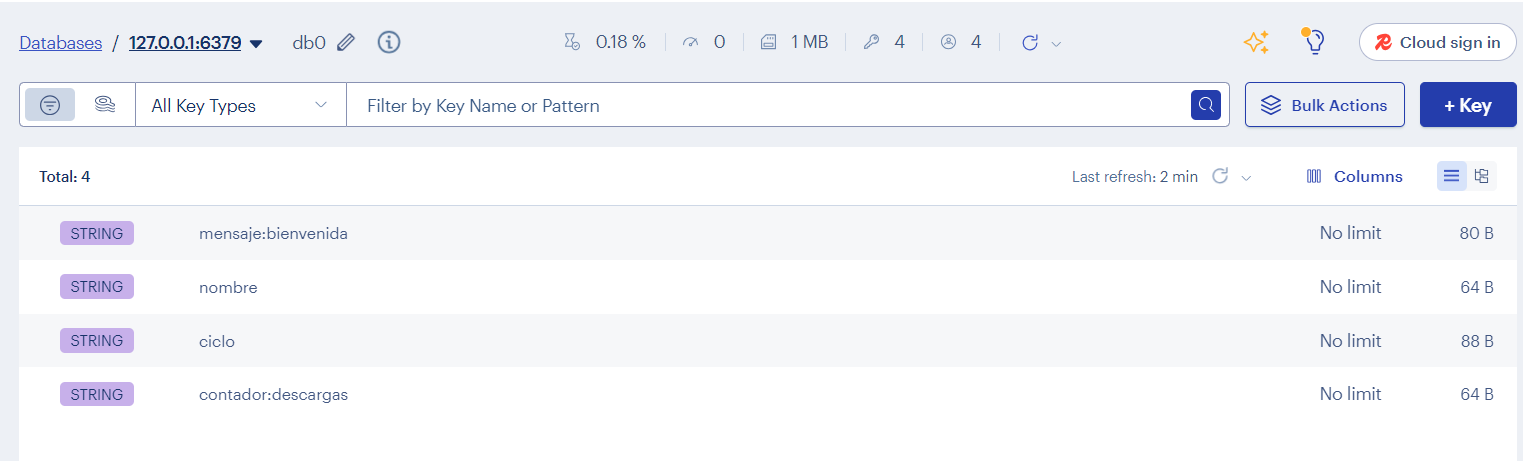